<a href="https://colab.research.google.com/github/hamsungmin/DataTrainAnalysis/blob/main/project_week10_PDF_%ED%99%9C%EC%9A%A9_FAQ_%EA%B2%80%EC%83%89_%EB%AA%A8%EB%8D%B8_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 진행 프로세스**

- 품질관리 매뉴얼의 pdf에서 에서 **핵심 데이터를 추출**하고 **구조화** 하여 저장합니다.
    - 정규표현식을 활용해 월별 품질성과, 불량 유형별 비율, 고객 불만 TOP 4를 파싱하고
    - 추출된 데이터는 제공된 딕셔너리 구조에 맞춰 저장한 후 `extracted_data.json` 파일로 출력


In [ ]:
%pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 61.3 MB/s eta 0:00:00


In [ ]:
import fitz

pdf_document = fitz.open("/content/ABC전자 스마트폰 제조 품질관리 매뉴얼.pdf")
pdf_text = ""
for page_num in range(pdf_document.page_count):
    page = pdf_document.load_page(page_num)
    pdf_text += page.get_text()

pdf_document.close()

정규 표현식을 활용하여 추출
1. 월별 품질성과
2. 불량 유형별 비율
3. 고객 불만 TOP 4


In [ ]:
import re

monthly_performance_pattern = r"•\s*(\d{1,2}월):\s*불량률\s*(\d+\.?\d+)%,\s*고객만족도\s*(\d+)점"

monthly_performance_matches_final = re.findall(monthly_performance_pattern, pdf_text)

monthly_quality_performance = {}
for month, defect_rate, satisfaction_score in monthly_performance_matches_final:
    monthly_quality_performance[f"2024년 {month}"] = {
        "불량률": float(defect_rate),
        "고객만족도": int(satisfaction_score)
    }

print("월별 품질성과")
print(monthly_quality_performance)
print("-"*100)
defect_ratio_pattern = r"([가-힣]+) 불량 \(전체 불량의\s*(\d+)%\)"
defect_ratio_matches = re.findall(defect_ratio_pattern, pdf_text)
defect_dict = {name: int(percent) for name, percent in defect_ratio_matches}


print("불량 유형별 비율")
print(defect_dict)
print("-"*100)
customer_complaint_pattern = r"\d+\.\s*([가-힣\s]+)\s*\((\d+)건\)"
customer_complaint_match = re.findall(customer_complaint_pattern, pdf_text)
complaint_dict = {match[0].strip(): int(match[1]) for match in customer_complaint_match}
print("고객 불만 TOP 4 ")
print(complaint_dict)

월별 품질성과
{'2024년 1월': {'불량률': 2.8, '고객만족도': 85}, '2024년 2월': {'불량률': 2.5, '고객만족도': 86}, '2024년 3월': {'불량률': 2.3, '고객만족도': 87}}
----------------------------------------------------------------------------------------------------
불량 유형별 비율
{'디스플레이': 35, '배터리': 25, '카메라': 20}
----------------------------------------------------------------------------------------------------
고객 불만 TOP 4 
{'배터리 수명 단축': 42, '화면 터치 반응 지연': 38, '카메라 화질 저하': 31, '충전 속도 저하': 29}


In [ ]:
extracted_data = {}
extracted_data['월별 품질 성과'] = monthly_quality_performance
extracted_data['불량 유형별 비율'] = defect_dict
extracted_data['고객 불만 TOP 4'] = complaint_dict

print(extracted_data)

{'월별 품질 성과': {'2024년 1월': {'불량률': 2.8, '고객만족도': 85}, '2024년 2월': {'불량률': 2.5, '고객만족도': 86}, '2024년 3월': {'불량률': 2.3, '고객만족도': 87}}, '불량 유형별 비율': {'디스플레이': 35, '배터리': 25, '카메라': 20}, '고객 불만 TOP 4': {'배터리 수명 단축': 42, '화면 터치 반응 지연': 38, '카메라 화질 저하': 31, '충전 속도 저하': 29}}


In [ ]:
import json

with open('extracted_data.json', 'w', encoding='utf-8') as f:
    json.dump(extracted_data, f, ensure_ascii=False, indent=4)

print("[저장완료] extracted_data.json")

[저장완료] extracted_data.json


- **PDF 문서의 검색기반 하이라이트**를 구현합니다.
    
    (참조파일:  ‘문제1_제공코드_PDF하이라이트.ipynb’)
    
    검색한 단어를 자동으로 하이라이트를 하면 방대한 문서에서 필요한 정보를 즉시 시각적으로 식별하고, 관련 내용만 추출하여 분석 시간을 획기적으로 단축시킬수 있습니다.
    
    - 검색한 단어를 PDF 문서에서 찾아 하이라이트
    - 검색 결과의 줄 단위 자료 추출  출력 및 ‘검색결과_검색어.txt’ 저장

In [ ]:
import fitz # PyMuPDF
import os
# 추출된 텍스트 파일 저장 (페이지별로 묶어서)
from collections import defaultdict

# 검색어 변수 설정
search_keyword = "배터리" # 여기에 검색할 단어를 입력하세요.

# 파일 경로 설정
pdf_file_path = "/content/ABC전자 스마트폰 제조 품질관리 매뉴얼.pdf"
output_text_file = f"검색결과_{search_keyword}.txt"
document = fitz.open(pdf_file_path)
extracted_lines = []

base_name = os.path.splitext(os.path.basename(pdf_file_path))[0]
output_dir = os.path.dirname(pdf_file_path)

output_pdf_path = os.path.join(output_dir, f"검색결과_{search_keyword}.pdf")
output_text_file = os.path.join(output_dir, f"검색결과_{search_keyword}.txt")

for page_number in range(document.page_count):
    page = document.load_page(page_number)
    text_instances = page.search_for(search_keyword)

    # 하이라이트 추가
    for inst in text_instances:
        highlight = page.add_highlight_annot(inst)

    # 검색 결과가 포함된 줄 추출
    if text_instances:
        page_text = page.get_text("text")
        lines = page_text.splitlines()
        for line in lines:
          if search_keyword in line:
              extracted_lines.append(f"Page {page_number + 1}: {line}")

# 하이라이트된 PDF 저장
document.save(output_pdf_path)
document.close()
# 페이지별로 라인 묶기
pages_dict = defaultdict(list)
for line in extracted_lines:
    # extracted_lines: "Page 1: line 내용"
    page_num, text = line.split(":", 1)
    pages_dict[page_num.strip()].append(text.strip())
# 추출된 텍스트 파일 저장
with open(output_text_file, "w", encoding="utf-8") as f:
    for page_num in sorted(pages_dict.keys(), key=lambda x: int(x.split()[1])):
        lines = pages_dict[page_num]
        f.write(f"{page_num} ({len(lines)}건)\n")
        f.write("-" * 40 + "\n")
        for line in lines:
            f.write(line + "\n")
        f.write("\n")  # 페이지 구분을 위해 빈 줄 추가

print(f"'{search_keyword}' 검색 결과 하이라이트된 PDF가 '{output_pdf_path}'로 저장되었습니다.")
print(f"'{search_keyword}' 검색 결과 텍스트가 '{output_text_file}'로 저장되었습니다.")


'배터리' 검색 결과 하이라이트된 PDF가 '/content/검색결과_배터리.pdf'로 저장되었습니다.
'배터리' 검색 결과 텍스트가 '/content/검색결과_배터리.txt'로 저장되었습니다.


**2. PDF추출 구조화 데이터를 이용한 FAQ 검색 시스템 구축**

**2. 진행 프로세스**

- 1번문서에서 추출된 품질 데이터 ‘extracted_data.json’ 을 활용해  FAQ 검색 시스템을 구축합니다.
    - TF-IDF 벡터화로 사용자 질문과 가장 유사한 FAQ를 찾아 답변을 제공
    - 5개 FAQ를 JSON 데이터 기반으로 자동 생성
    - 코사인 유사도로 최적 답변 매칭
    - 검색 로그를 CSV 파일로 저장 (질문, 답변, 시간)

[선택사항] GPTAPI를 이용한 프롬프트로 변경하여도 되며, 1-2번을 스트림릿으로 챗봇화면을 구현

In [ ]:
import json

with open('extracted_data.json', 'r', encoding='utf-8') as f:
    extracted_data_from_json = json.load(f)

print(extracted_data_from_json)

{'월별 품질 성과': {'2024년 1월': {'불량률': 2.8, '고객만족도': 85}, '2024년 2월': {'불량률': 2.5, '고객만족도': 86}, '2024년 3월': {'불량률': 2.3, '고객만족도': 87}}, '불량 유형별 비율': {'디스플레이': 35, '배터리': 25, '카메라': 20}, '고객 불만 TOP 4': {'배터리 수명 단축': 42, '화면 터치 반응 지연': 38, '카메라 화질 저하': 31, '충전 속도 저하': 29}}


5개 FAQ를 JSON 데이터 기반으로 자동 생성

In [ ]:
faqs = {}

# FAQ 1: 월별 불량률은 어떻게 되나요?
faqs["월별 불량률은 어떻게 되나요?"] = f"2024년 1월 불량률은 {extracted_data_from_json['월별 품질 성과']['2024년 1월']['불량률']}%, 2월은 {extracted_data_from_json['월별 품질 성과']['2024년 2월']['불량률']}%, 3월은 {extracted_data_from_json['월별 품질 성과']['2024년 3월']['불량률']}% 입니다."

# FAQ 2: 월별 고객만족도는 어떻게 되나요?
faqs["월별 고객만족도는 어떻게 되나요?"] = f"2024년 1월 고객만족도는 {extracted_data_from_json['월별 품질 성과']['2024년 1월']['고객만족도']}점, 2월은 {extracted_data_from_json['월별 품질 성과']['2024년 2월']['고객만족도']}점, 3월은 {extracted_data_from_json['월별 품질 성과']['2024년 3월']['고객만족도']}점 입니다."

# FAQ 3: 불량 유형별 비율은 어떻게 되나요?
defect_ratios = extracted_data_from_json['불량 유형별 비율']
defect_ratio_answer = ", ".join([f"{key}: {value}%" for key, value in defect_ratios.items()])
faqs["불량 유형별 비율은 어떻게 되나요?"] = f"주요 불량 유형별 비율은 {defect_ratio_answer} 입니다."

# FAQ 4: 고객 불만 TOP 4는 무엇인가요?
customer_complaints = extracted_data_from_json['고객 불만 TOP 4']
complaint_answer = ", ".join([f"{key} ({value}건)" for key, value in customer_complaints.items()])
faqs["고객 불만 TOP 4는 무엇인가요?"] = f"고객 불만 TOP 4는 {complaint_answer} 입니다."

# FAQ 5: 3월의 품질 성과는 어떤가요?
march_performance = extracted_data_from_json['월별 품질 성과']['2024년 3월']
faqs["3월의 품질 성과는 어떤가요?"] = f"2024년 3월의 불량률은 {march_performance['불량률']}%이고, 고객만족도는 {march_performance['고객만족도']}점 입니다."

print(faqs)

{'월별 불량률은 어떻게 되나요?': '2024년 1월 불량률은 2.8%, 2월은 2.5%, 3월은 2.3% 입니다.', '월별 고객만족도는 어떻게 되나요?': '2024년 1월 고객만족도는 85점, 2월은 86점, 3월은 87점 입니다.', '불량 유형별 비율은 어떻게 되나요?': '주요 불량 유형별 비율은 디스플레이: 35%, 배터리: 25%, 카메라: 20% 입니다.', '고객 불만 TOP 4는 무엇인가요?': '고객 불만 TOP 4는 배터리 수명 단축 (42건), 화면 터치 반응 지연 (38건), 카메라 화질 저하 (31건), 충전 속도 저하 (29건) 입니다.', '3월의 품질 성과는 어떤가요?': '2024년 3월의 불량률은 2.3%이고, 고객만족도는 87점 입니다.'}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

faq_questions = list(faqs.keys())
faq_vectors = vectorizer.fit_transform(faq_questions)

print("FAQ 질문")
print(faq_questions)
print("FAQ Vectors ")
print(faq_vectors.shape)

FAQ 질문
['월별 불량률은 어떻게 되나요?', '월별 고객만족도는 어떻게 되나요?', '불량 유형별 비율은 어떻게 되나요?', '고객 불만 TOP 4는 무엇인가요?', '3월의 품질 성과는 어떤가요?']
FAQ Vectors 
(5, 17)


**검색 시스템 구현**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import csv
import datetime
import os

log_file_path = 'search_log.csv'
current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")



test_queries = ["월별 고객만족도는 어떻게 되나요?", "불량률", "3월의 품질 성과", "불량률이 가장 낮은 달은?", "고객 불만 TOP 4는 무엇인가요"]

for question in test_queries:
    user_question = question
    user_question_vector = vectorizer.transform([user_question])
    similarities = cosine_similarity(user_question_vector, faq_vectors)
    most_similar_faq_index = np.argmax(similarities)
    most_similar_faq_question = faq_questions[most_similar_faq_index]
    answer = faqs[most_similar_faq_question]
    print(f"질문: {user_question}")
    print(f"답변: {answer}")
    print("")
    with open(log_file_path, 'a', newline='', encoding='utf-8') as f:
      csv_writer = csv.writer(f)

      # Check if the file is empty to write header
      if os.path.getsize(log_file_path) == 0:
          csv_writer.writerow(['질문', '답변', '시간'])
      log_data = [user_question, answer, current_time]

      csv_writer.writerow(log_data)

print(f"[검색 완료] {log_file_path} 저장됨")


질문: 월별 고객만족도는 어떻게 되나요?
답변: 2024년 1월 고객만족도는 85점, 2월은 86점, 3월은 87점 입니다.

질문: 불량률
답변: 2024년 1월 불량률은 2.8%, 2월은 2.5%, 3월은 2.3% 입니다.

질문: 3월의 품질 성과
답변: 2024년 3월의 불량률은 2.3%이고, 고객만족도는 87점 입니다.

질문: 불량률이 가장 낮은 달은?
답변: 2024년 1월 불량률은 2.8%, 2월은 2.5%, 3월은 2.3% 입니다.

질문: 고객 불만 TOP 4는 무엇인가요
답변: 고객 불만 TOP 4는 배터리 수명 단축 (42건), 화면 터치 반응 지연 (38건), 카메라 화질 저하 (31건), 충전 속도 저하 (29건) 입니다.

[검색 완료] search_log.csv 저장됨


In [ ]:
#[선택사항] GPTAPI를 이용한 프롬프트로 변경하여도 되며, 1-2번을 스트림릿으로 챗봇화면을 구현


In [ ]:
%pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.2 MB/s eta 0:00:00


In [ ]:
%%writefile streamlit_app.py

import streamlit as st
import json
import re
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the extracted data
try:
    with open('C:\데이터분석\kaggle\extracted_data.json', 'r', encoding='utf-8') as f:
        extracted_data = json.load(f)
except FileNotFoundError:
    st.error("extracted_data.json 파일을 찾을 수 없습니다. PDF 데이터 추출을 먼저 실행해주세요.")
    extracted_data = None

# --- FAQ 생성 (데이터 기반) ---
# extracted_data가 로드되었을 경우 FAQ 생성
faqs = {}

if extracted_data:

    # FAQ 1: 월별 불량률은 어떻게 되나요?
    faqs["월별 불량률은 어떻게 되나요?"] = f"2024년 1월 불량률은 {extracted_data['월별 품질 성과']['2024년 1월']['불량률']}%, 2월은 {extracted_data['월별 품질 성과']['2024년 2월']['불량률']}%, 3월은 {extracted_data['월별 품질 성과']['2024년 3월']['불량률']}% 입니다."

    # FAQ 2: 월별 고객만족도는 어떻게 되나요?
    faqs["월별 고객만족도는 어떻게 되나요?"] = f"2024년 1월 고객만족도는 {extracted_data['월별 품질 성과']['2024년 1월']['고객만족도']}점, 2월은 {extracted_data['월별 품질 성과']['2024년 2월']['고객만족도']}점, 3월은 {extracted_data['월별 품질 성과']['2024년 3월']['고객만족도']}점 입니다."

    # FAQ 3: 불량 유형별 비율은 어떻게 되나요?
    defect_ratios = extracted_data['불량 유형별 비율']
    defect_ratio_answer = ", ".join([f"{key}: {value}%" for key, value in defect_ratios.items()])
    faqs["불량 유형별 비율은 어떻게 되나요?"] = f"주요 불량 유형별 비율은 {defect_ratio_answer} 입니다."

    # FAQ 4: 고객 불만 TOP 4는 무엇인가요?
    customer_complaints = extracted_data['고객 불만 TOP 4']
    complaint_answer = ", ".join([f"{key} ({value}건)" for key, value in customer_complaints.items()])
    faqs["고객 불만 TOP 4는 무엇인가요?"] = f"고객 불만 TOP 4는 {complaint_answer} 입니다."

    # FAQ 5: 3월의 품질 성과는 어떤가요?
    march_performance = extracted_data['월별 품질 성과']['2024년 3월']
    faqs["3월의 품질 성과는 어떤가요?"] = f"2024년 3월의 불량률은 {march_performance['불량률']}%이고, 고객만족도는 {march_performance['고객만족도']}점 입니다."


    # --- TF-IDF 벡터화 준비 및 FAQ 벡터화 ---
    vectorizer = TfidfVectorizer()

    faq_questions = list(faqs.keys())
    faq_vectors = vectorizer.fit_transform(faq_questions)


# --- Streamlit 앱 시작 ---
st.title("ABC전자 스마트폰 품질관리 챗봇")

st.write("품질 관련 궁금한 점을 질문해주세요.")

# 사용자 입력
user_question = st.text_input("질문을 입력하세요:")


if user_question:
    if not extracted_data or not faqs:
        st.warning("데이터가 로드되어 있지 않거나 FAQ가 없습니다. extracted_data.json을 확인해주세요.")
    else:
        # --- 검색 시스템 구현 (TF-IDF + 코사인 유사도) ---
        user_question_vector = vectorizer.transform([user_question])
        similarities = cosine_similarity(user_question_vector, faq_vectors)[0]
        most_similar_faq_index = int(np.argmax(similarities))
        similarity_score = float(similarities[most_similar_faq_index])


        # 코사인 유사도 임계값 설정
        similarity_threshold = 0.1 # 이 값을 조정하여 답변 정확도를 조절할 수 있습니다.


        if similarity_score > similarity_threshold:
            # 질문(키) 대신 올바른 답변(값)을 출력하도록 수정했습니다.
            matched_question = faq_questions[most_similar_faq_index]
            answer = faqs.get(matched_question, "해당 질문에 대한 답변이 준비되어 있지 않습니다.")
            st.write(f"**매칭 FAQ:** {matched_question} (유사도: {similarity_score:.2f})")
            st.write(f"**챗봇 답변:** {answer}")
        else:
            # 유사도가 낮을 경우, 간단한 키워드 기반 보조 검색
            fallback = None
            tokens = [t.strip() for t in re.split(r"\s|,|/|\\.|\\(|\\)", user_question) if t.strip()]
            for k, v in faqs.items():
                if any(tok in k or tok in v for tok in tokens):
                    fallback = v
                    break


            if fallback:
                st.write("정확한 매칭은 낮지만, 관련 답변을 찾아보았습니다:")
                st.write(fallback)
            else:
                st.write("죄송합니다. 질문에 대한 답변을 찾을 수 없습니다.")


Writing streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py & npx lt --port 8501

⠙⠹⠸⠼⠴npm error could not determine executable to run
⠴npm error A complete log of this run can be found in: /root/.npm/_logs/2025-09-20T21_41_01_654Z-debug-0.log
⠴


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.187.251.24:8501

  Stopping...


Streamlit 결과 화면

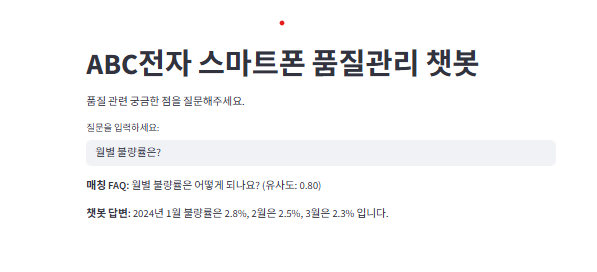

**3. 한국어 뉴스 피드에서 작업관련 뉴스 수집 + RSS 뉴스 답변**

<aside>

**3. 진행 프로세스**

- feed_specs.csv 파일의 RSS 피드에서 뉴스를 수집하고 품질 관련 키워드로 필터링합니다.
    - **키워드 기반 필터링 :**  품질/제조 관련 키워드 20개 이상 정의
                                         (GPT를 이용하여 키워드를 증강합니다.)
    - 제목에 키워드가 포함된 뉴스만 추출하여 저장합니다.  
    rss_result.json (키워드, 개수, 뉴스 포함)

키워드 기반 필터링 : 품질/제조 관련 키워드 20개 이상 정의 (GPT를 이용하여 키워드를 증강합니다.)

In [ ]:
import openai
import os
from google.colab import userdata

OPENAI_API_KEY = userdata.get('open_api')

if OPENAI_API_KEY:
    openai.api_key = OPENAI_API_KEY

keywords = ['배터리', '디스플레이', '불량', '품질']
display(keywords)

prompt = f"""
다음 초기 키워드를 바탕으로 품질 및 제조와 관련된 추가적인 한국어 키워드 목록을 20개 이상 제공해주세요.
초기 키워드: {', '.join(keywords)}

새로운 키워드 목록만 쉼표로 구분하여 제공하고, 다른 텍스트나 형식은 포함하지 마세요.
"""


response = openai.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "너는 관련 키워드를 생성하는데 뛰어난 능력을 갖은 직원이야"},
        {"role": "user", "content": prompt}
    ],
    max_tokens=200,
    n=1,
    stop=None,
    temperature=0.7
)

additional_keywords_text = response.choices[0].message.content.strip()

additional_keywords = [kw.strip() for kw in additional_keywords_text.split(',') if kw.strip()]

final_keywords = list(set(keywords + additional_keywords))

display(additional_keywords)

display(final_keywords)




['배터리', '디스플레이', '불량', '품질']

['품질 관리',
 '제조 공정',
 '품질 보증',
 '불량률',
 '생산성 향상',
 '검사 시스템',
 '결함 분석',
 '원자재 품질',
 '공정 개선',
 '고객 만족도',
 '생산 설비',
 '자동화 시스템',
 '테스트 및 검사',
 '품질 인증',
 '원가 절감',
 '제조 효율성',
 '기술 표준',
 '품질 시스템',
 '데이터 분석',
 '품질 평가']

['결함 분석',
 '품질 보증',
 '불량률',
 '배터리',
 '원자재 품질',
 '검사 시스템',
 '자동화 시스템',
 '원가 절감',
 '제조 효율성',
 '디스플레이',
 '고객 만족도',
 '공정 개선',
 '기술 표준',
 '품질 인증',
 '테스트 및 검사',
 '품질 관리',
 '품질',
 '생산성 향상',
 '품질 시스템',
 '품질 평가',
 '불량',
 '제조 공정',
 '데이터 분석',
 '생산 설비']

제목에 키워드가 포함된 뉴스만 추출하여 저장합니다.  
    rss_result.json (키워드, 개수, 뉴스 포함)

In [ ]:
import pandas as pd

df_feeds = pd.read_csv('feed_specs.csv')
rss_urls = df_feeds['url'].tolist()


In [ ]:
import feedparser
from collections import defaultdict

rss_results = defaultdict(list)

In [ ]:
%pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.9 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=0e7055f23702a938c1a8a2a5251b1c09d60192f92251ac285c386a75b5af8f04
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


In [ ]:
import feedparser
from collections import defaultdict

rss_results = defaultdict(list)
total_news_count = 0

for url in rss_urls:
    feed = feedparser.parse(url)
    if feed.entries:
        total_news_count += len(feed.entries)
        #URL로 검색된 뉴스에 title이 위에 증강된 키워드와 매칭되는지 확인
        for entry in feed.entries:
            if hasattr(entry, 'title'):
                title = entry.title
                for keyword in final_keywords:
                    if keyword in title:
                        rss_results[keyword].append({'title': title, 'link': url})

quality_news_count = sum(len(news_list) for news_list in rss_results.values())

print("[수집 완료]")
print(f"전체 뉴스: {total_news_count}개")
print(f"키워드 관련 뉴스 : {quality_news_count}개 (키워드: {', '.join(rss_results.keys())})")
print("파일: rss_result.json")


[수집 완료]
전체 뉴스: 4983개
키워드 관련 뉴스 : 14개 (키워드: 디스플레이, 품질, 불량, 배터리)
파일: rss_result.json


In [ ]:
structured_results = {}

for keyword, news_list in rss_results.items():
    structured_results[keyword] = {
        "count": len(news_list),
        "news": news_list
    }
    print(f"{keyword} 뉴스 : {len(news_list)} 개")
with open('rss_result.json', 'w', encoding='utf-8') as f:
    json.dump(structured_results, f, ensure_ascii=False, indent=4)

print("[저장 완료] rss_result.json")

디스플레이 뉴스 : 1 개
품질 뉴스 : 5 개
불량 뉴스 : 5 개
배터리 뉴스 : 3 개
[저장 완료] rss_result.json


In [ ]:
import csv

csv_file_path = 'rss_result.csv'

csv_data = []
csv_data.append(['키워드', '뉴스 제목', '뉴스 링크'])

for keyword, data in structured_results.items():
    for news_item in data['news']:
        csv_data.append([keyword, news_item['title'], news_item['link']])


with open(csv_file_path, 'w', newline='', encoding='utf-8') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerows(csv_data)

print(f"[저장 완료] {csv_file_path}")



[저장 완료] rss_result.csv


**4. 진행 프로세스**

- 다음의 내용을 참조하여 **통합챗봇 프로세스**를 기획하고 **대시보드를 구상 또는 구현**하여 봅니다.
    
     (프로그램으로 꼭 작성하지 않아도 되며, 대시보드는 PT로 구현해도 됩니다.)
    
    
    - **데이터 통합**: PDF extracted_data.json + RSS rss_result.json
    - **지능형 FAQ**: 불량률, 불량유형, 고객불만 + 최신 뉴스 결합
    - **검색 엔진**: TF-IDF 기반 질문-답변 매칭
    - **소스 표시**: PDF/RSS 출처 명시

In [ ]:
%%writefile streamlit_rss.py
import streamlit as st
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
import matplotlib.pyplot as plt
import os

st.set_page_config(layout="wide")  # 전체 화면 넓게

# 레이아웃: 좌(1), 중(2), 우(3)
col1, col2, col3 = st.columns([1,3,3])
# 로컬 JSON 경로 입력
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'AppleGothic', 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
with col1:
    # 검색 로그
    st.subheader("자주 묻는 질문")
    log_path = "search_log.csv"
    if os.path.exists(log_path):
        logs = pd.read_csv(log_path)
        faq_counts = logs.groupby('질문').size().reset_index(name='횟수').sort_values('횟수', ascending=False)
        st.dataframe(faq_counts.head(5))
    else:
        st.info("아직 검색 로그가 없습니다.")
# --- 좌측: 뉴스 + 검색 로그 ---
with col2:
    st.header("정보 & 최신 뉴스")
    rss_path = "rss_result.json"


    # 뉴스
    st.subheader("최신 뉴스")
    if os.path.exists(rss_path):
        rss_data = json.load(open(rss_path, encoding='utf-8'))
        for category, info in rss_data.items():
            st.markdown(f"### {category} ({info['count']})")
            for news in info['news']:
                st.markdown(f"- [{news['title']}]({news['link']})")



# --- 우측: 챗봇 ---
with col3:
    st.header("챗봇")
    user_input = st.text_input("질문을 입력하세요")
    pdf_path = "extracted_data.json"
    if user_input and os.path.exists(pdf_path) and os.path.exists(rss_path):
        pdf_data = json.load(open(pdf_path, encoding='utf-8'))
        texts, sources = [], []

        # PDF
        for k,v in pdf_data["월별 품질 성과"].items():
            texts.append(f"{k} 불량률:{v['불량률']} 고객만족도:{v['고객만족도']}")
            sources.append("PDF 데이터")
        # RSS
        for category, info in rss_data.items():
            for news in info['news']:
                texts.append(f"{category} {news['title']}")
                sources.append(news['link'])

        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(texts)
        query_vec = vectorizer.transform([user_input])
        sim = cosine_similarity(query_vec, tfidf_matrix)
        idx = sim.argmax()

        st.write(" **답변:**", texts[idx])
        st.write(" **출처:**", sources[idx])

        # 로그 저장
        now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        log_df = pd.DataFrame([[user_input, texts[idx], now]], columns=["질문","답변","시간"])
        if os.path.exists(log_path):
            log_df.to_csv(log_path, mode='a', header=False, index=False, encoding='utf-8-sig')
        else:
            log_df.to_csv(log_path, index=False, encoding='utf-8-sig')

# ---------------- 하단: PDF 요약 지표 ----------------
st.header(" PDF 요약 지표")
if os.path.exists(pdf_path):
    pdf_data = json.load(open(pdf_path, encoding='utf-8'))

    col_chart1, col_chart2, col_chart3 = st.columns(3)

    # --- 차트1: 월별 품질 성과 ---
    with col_chart1:
        quality_df = pd.DataFrame(pdf_data["월별 품질 성과"]).T.reset_index()
        quality_df.rename(columns={"index":"월"}, inplace=True)
        fig1, ax1 = plt.subplots(figsize=(4,3), dpi=80)
        ax1.plot(quality_df["월"], quality_df["불량률"], marker="o", label="불량률(%)")
        ax1.set_ylabel("불량률(%)")
        ax1_2 = ax1.twinx()
        ax1_2.plot(quality_df["월"], quality_df["고객만족도"], marker="s", color="green", label="고객만족도")
        ax1_2.set_ylabel("고객만족도")
        ax1.set_title("월별 품질 성과")
        st.pyplot(fig1, clear_figure=True)

    # --- 차트2: 불량 유형별 비율 ---
    with col_chart2:
        fault_df = pd.Series(pdf_data["불량 유형별 비율"])
        fig2, ax2 = plt.subplots(figsize=(4,3), dpi=80)
        ax2.pie(fault_df, labels=fault_df.index, autopct="%1.1f%%", startangle=90)
        ax2.set_title("불량 유형별 비율")
        st.pyplot(fig2, clear_figure=True)

    # --- 차트3: 고객 불만 TOP 4 ---
    with col_chart3:
        complaints_df = pd.Series(pdf_data["고객 불만 TOP 4"])
        fig3, ax3 = plt.subplots(figsize=(4,3), dpi=80)
        ax3.barh(complaints_df.index, complaints_df.values, color='skyblue')
        ax3.set_xlabel("건수")
        ax3.set_title("고객 불만 TOP 4")
        st.pyplot(fig3, clear_figure=True)


Overwriting streamlit_rss.py


In [ ]:
!streamlit run /content/streamlit_rss.py & npx lt --port 8501

⠙⠹⠸

⠼⠴npm error could not determine executable to run
⠦npm error A complete log of this run can be found in: /root/.npm/_logs/2025-09-20T22_39_37_648Z-debug-0.log
⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.187.251.24:8501

  Stopping...


***질문 로그 | 최신 뉴스 | 챗봇***

으로 대시보드를 구현하였습니다

챗봇에 질문을 하게되면 search_log.csv파일에 저장이 되고

질문 로그는 csv 파일을 읽어와서 보여주어 사용자가 질문한 내용을 집계하게 됩니다

***하단에는 PDF 내용을 간단하게 정리한 차트***를 구성하였습니다.

Streamlit으로 구현하였고 구현된 화면 캡처하여 첨부합니다




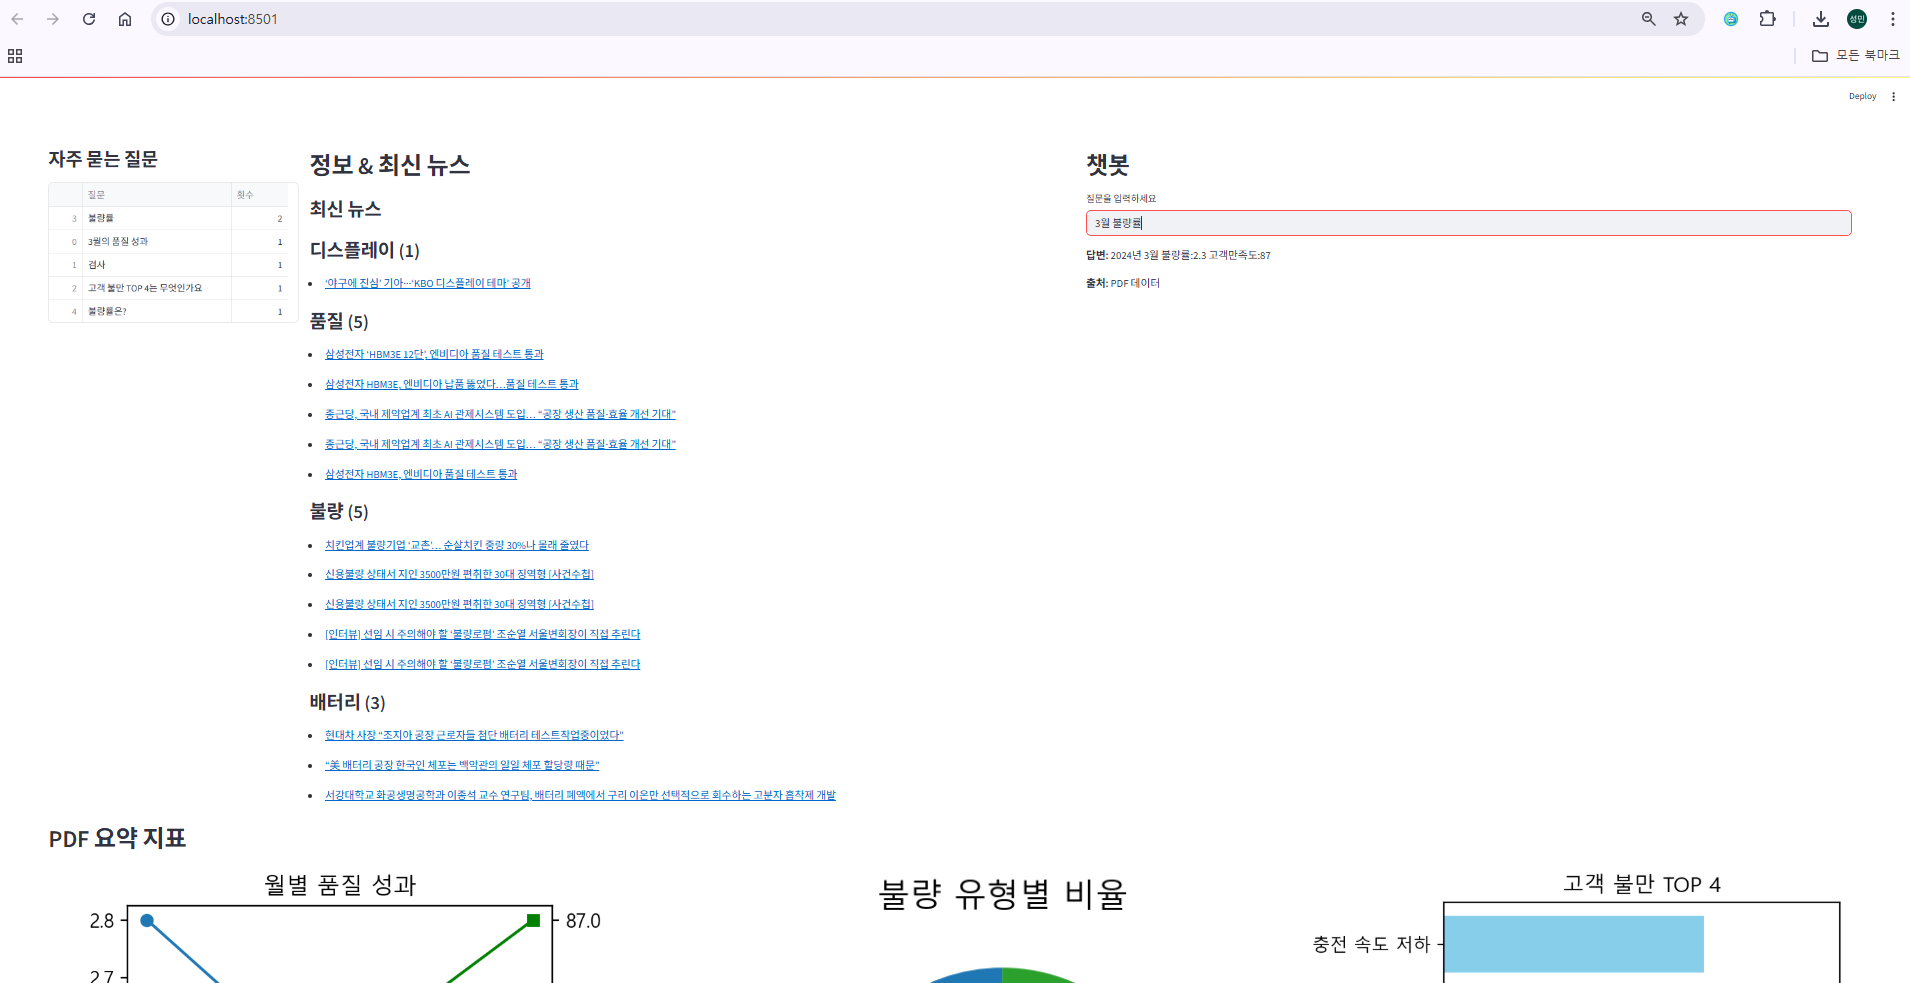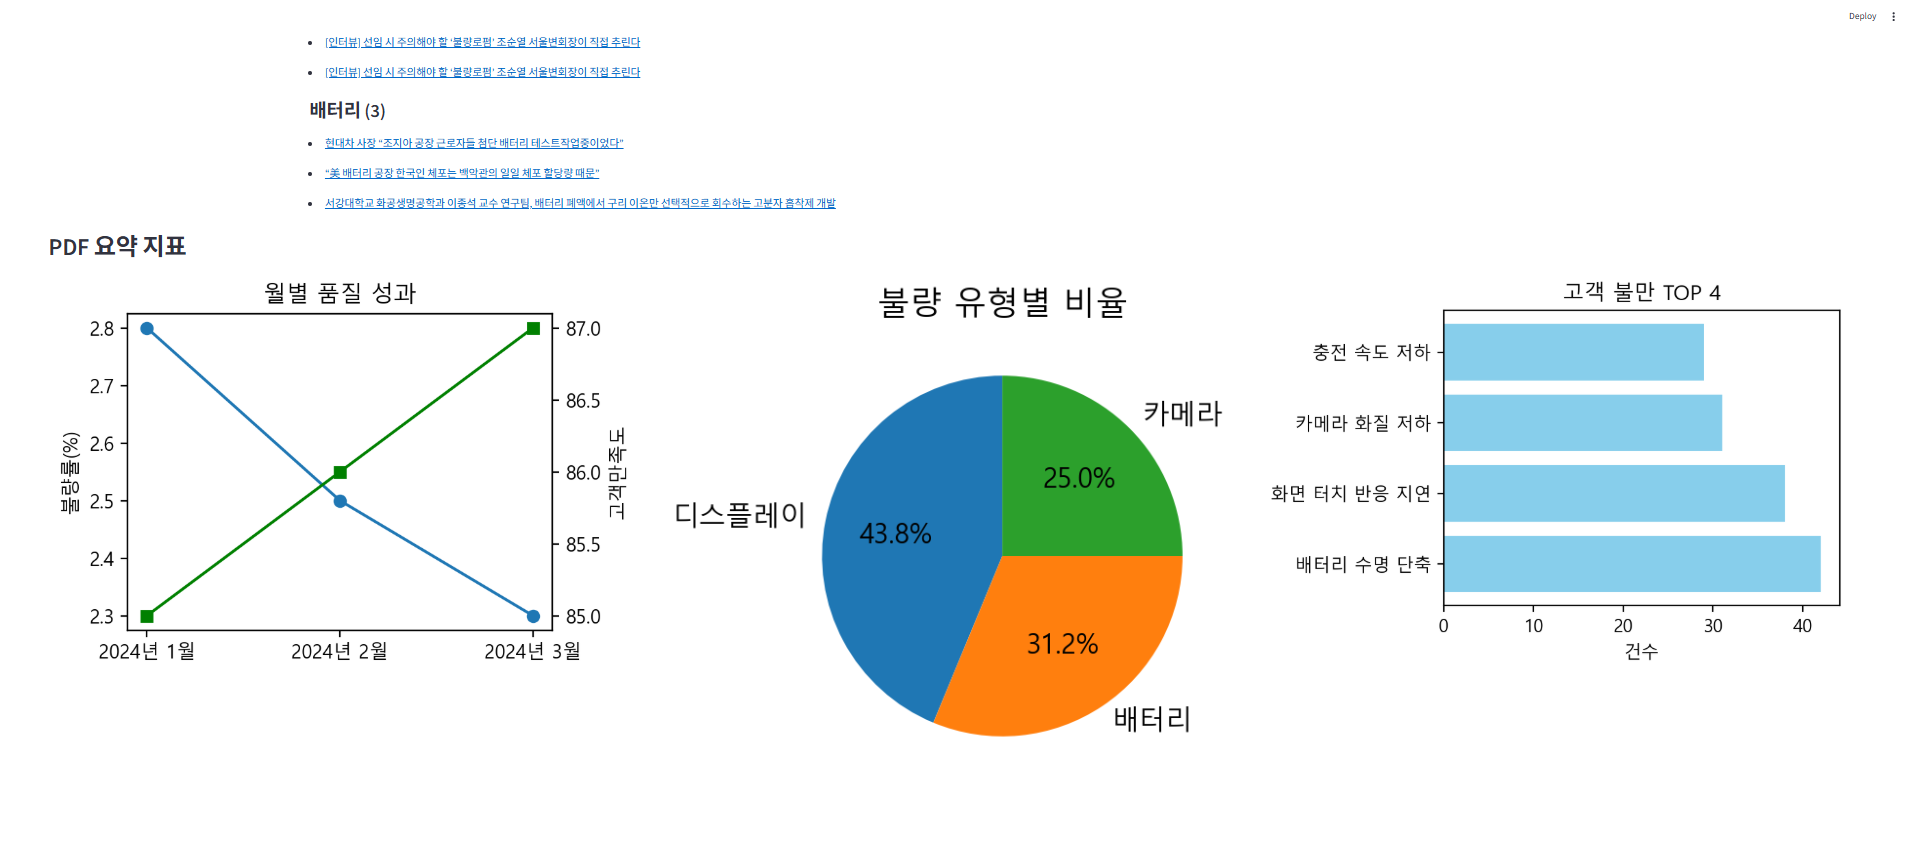